**Linear Regression**

In [0]:
import torch
from fastai.basics import *

In [0]:
n = 100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.0324,  1.0000],
        [ 0.2614,  1.0000],
        [ 0.7551,  1.0000],
        [-0.7969,  1.0000],
        [ 0.4435,  1.0000]])

In [0]:
a=tensor(3.,2)
y=x@a + torch.rand(n)

In [5]:
y

tensor([ 2.4423,  2.8576,  4.4099, -0.1520,  3.4315,  4.1344,  2.8759,  1.5142,
         0.5289,  2.5666,  0.1671,  0.8812,  4.9852,  4.3893,  3.7739,  4.3806,
         1.8554,  1.8368,  5.3819,  3.4101,  5.0327,  3.4521,  1.8831,  4.4754,
         1.1152,  1.6784,  4.7875,  1.1659,  4.0491,  0.4350,  3.6731, -0.5553,
         3.6602,  4.9453,  3.5699,  4.0758,  4.5225,  3.5281,  2.9066,  1.8709,
         1.9005,  0.3631,  0.0094,  1.7879,  0.5757,  0.5857,  0.8733,  0.4203,
         1.6351,  3.8117,  1.2029,  4.5443,  1.9837,  3.4951,  1.0131,  2.8960,
         5.6887,  3.0443,  0.9807,  2.1120,  3.6064,  1.5464,  1.8551,  3.2083,
        -0.3692,  3.3917,  2.0593,  3.0699,  3.0041,  0.4663,  1.0837,  1.5726,
        -0.0883,  2.7662,  4.5473,  0.0180, -0.0475,  4.8277,  3.8266,  2.5275,
         0.5392,  2.6345,  2.9068,  4.2617,  3.7356,  1.0194,  2.8924,  0.7307,
         1.1191,  3.8819,  1.3957,  2.3266, -0.0084,  2.8738,  3.7386,  5.6755,
         0.2902,  2.8327,  0.9019,  2.04

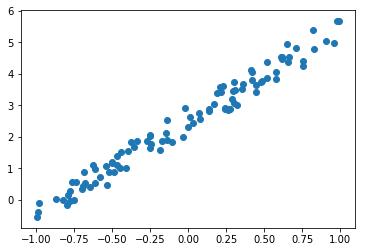

In [6]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat-y)**2).mean()

In [0]:
a = torch.rand(2)

In [9]:
a

tensor([0.9909, 0.9728])

In [10]:
y_hat = x@a
mse(y_hat,y)

tensor(3.3643)

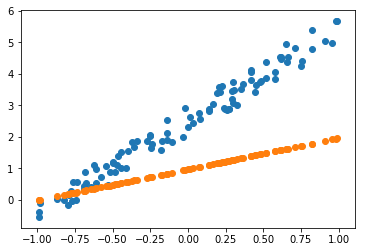

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [12]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([0.9909, 0.9728], requires_grad=True)

In [0]:
def backward_prop():
  y_hat=x@a
  loss=mse(y_hat,y)
  if t%10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [14]:
lr = 1e-1
for t in range(100): backward_prop()

tensor(3.3643, grad_fn=<MeanBackward0>)
tensor(0.4441, grad_fn=<MeanBackward0>)
tensor(0.1783, grad_fn=<MeanBackward0>)
tensor(0.1043, grad_fn=<MeanBackward0>)
tensor(0.0819, grad_fn=<MeanBackward0>)
tensor(0.0750, grad_fn=<MeanBackward0>)
tensor(0.0729, grad_fn=<MeanBackward0>)
tensor(0.0723, grad_fn=<MeanBackward0>)
tensor(0.0721, grad_fn=<MeanBackward0>)
tensor(0.0720, grad_fn=<MeanBackward0>)


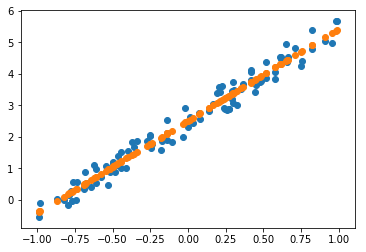

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

**Animation**

In [0]:
from matplotlib import animation,rc
rc('animation',html='jshtml')

In [0]:
%matplotlib inline

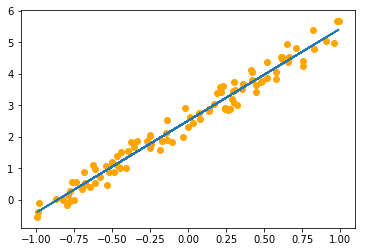

In [26]:
a=nn.Parameter(tensor(-1.,1))
fig=plt.figure()
plt.scatter(x[:,0],y,c='orange')
line,=plt.plot(x[:,0],x@a)
def animate(i):
  backward_prop()
  line.set_data(x[:,0],x@a)
  return line,
animation.FuncAnimation(fig,animate,frames=200,interval=20)